In [1]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = [16, 8]
matplotlib.rcParams.update({'font.size': 22})
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import numpy as np
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


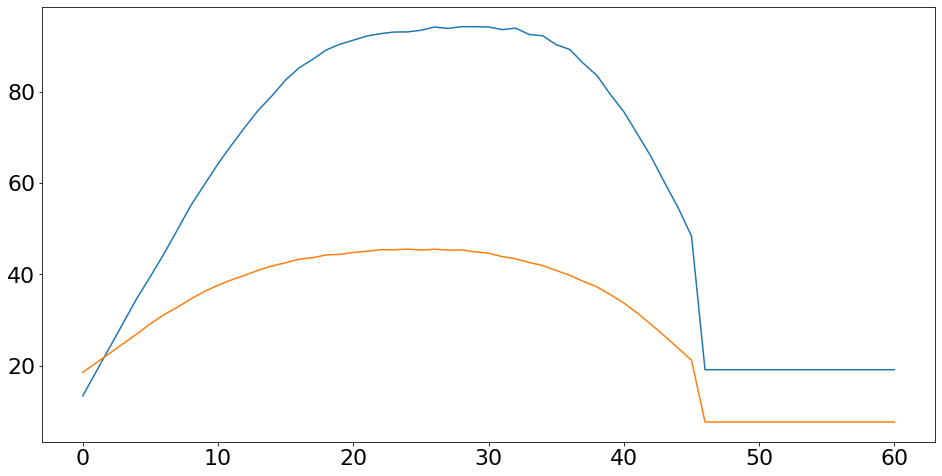

In [7]:
# income part
highIncome = np.load("highIncomeDetermined.npy")
lowIncome = np.load("lowIncomeDetermined.npy")
plt.plot(highIncome)
plt.plot(lowIncome)

### empirical econ

In [8]:
empiricalEcon = pd.read_csv('empiricalEcon.csv',delimiter=',')
empiricalEcon = empiricalEcon.set_index("year")
empiricalEcon = empiricalEcon/100

<AxesSubplot:xlabel='year'>

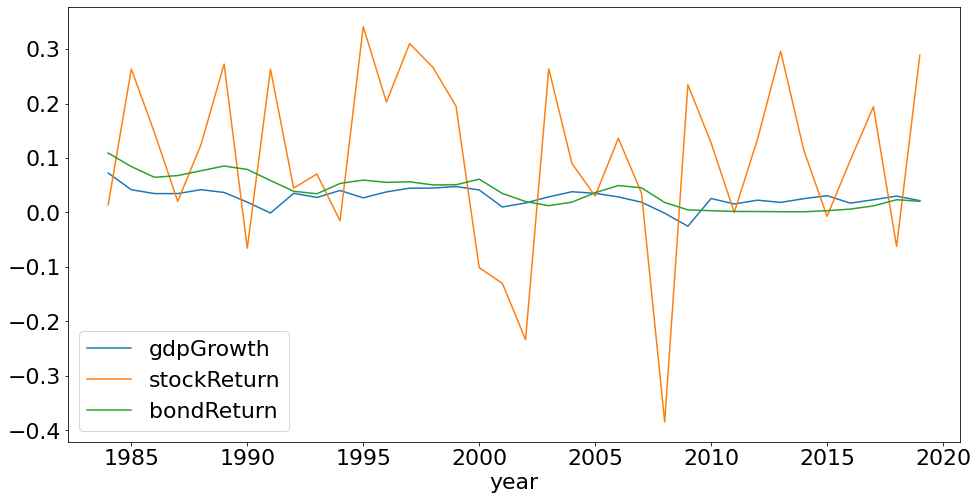

In [9]:
empiricalEcon.plot()

In [10]:
# The possible GDP growth, stock return, bond return
gkfe = np.genfromtxt('gkfe.csv',delimiter=',')
# GDP growth depending on current S state
gGDP = gkfe[:,0]/100
# risk free interest rate depending on current S state 
r_b = gkfe[:,1]/100
# stock return depending on current S state
r_k = gkfe[:,2]/100
# unemployment rate depending on current S state 
Pe = gkfe[:,7:]/100
Pe = Pe[:,::-1]

In [11]:
memoryState = np.column_stack((gGDP, r_k, r_b))
memoryState

array([[ 0.00469487, -0.27702961, -0.00841847],
       [ 0.04902714, -0.10135021,  0.01124221],
       [ 0.00469487, -0.18776457,  0.04698699],
       [ 0.04902714, -0.01208517,  0.06664767],
       [ 0.00469487,  0.21148841, -0.00841847],
       [ 0.04902714,  0.38716781,  0.01124221],
       [ 0.00469487,  0.30075345,  0.04698699],
       [ 0.04902714,  0.47643285,  0.06664767]])

In [12]:
def similarity(actualState, memoryState = memoryState):
    '''
        state is charactorized as 3 dim vector
    '''
    diffState = np.sum(np.abs(actualState - memoryState), axis = 1)
    distance = np.min(diffState)
    state = np.argmin(diffState)
    return distance, state

similarity, imaginedEconState = np.vectorize(similarity, signature='(n)->(),()')(empiricalEcon.values)

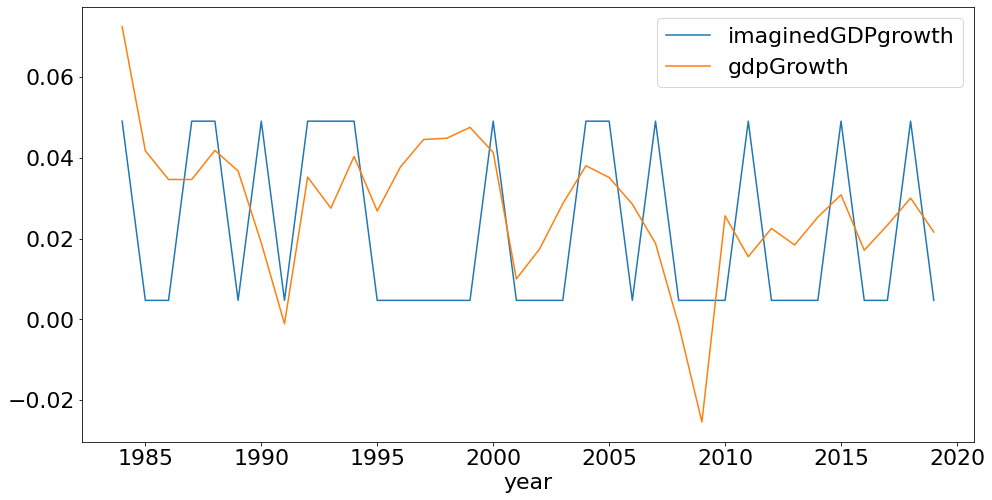

In [13]:
plt.plot(empiricalEcon.index,gGDP[imaginedEconState], label = "imaginedGDPgrowth")
empiricalEcon['gdpGrowth'].plot()
plt.legend()

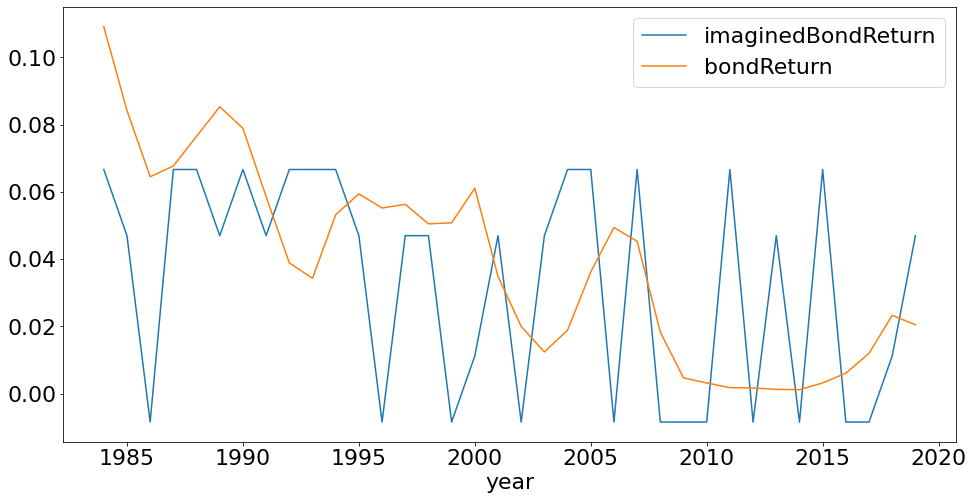

In [14]:
plt.plot(empiricalEcon.index,r_b[imaginedEconState], label = "imaginedBondReturn")
empiricalEcon['bondReturn'].plot()
plt.legend()

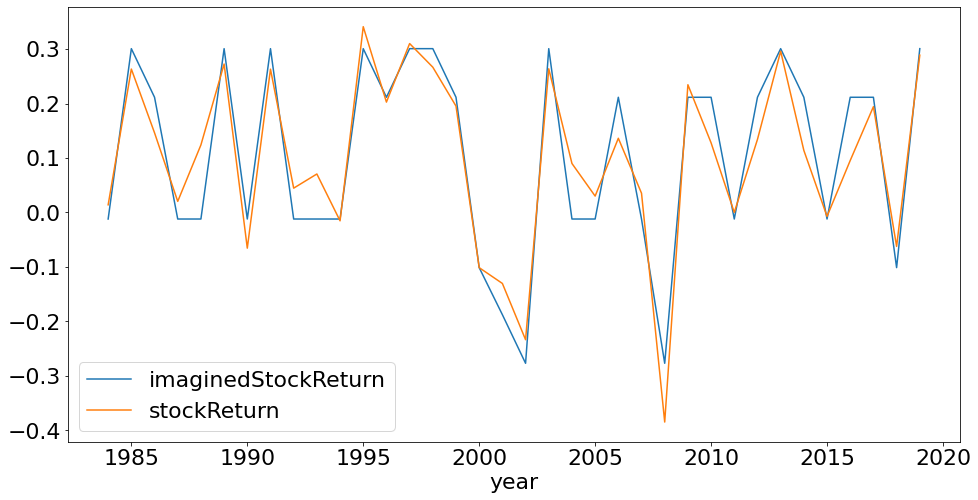

In [15]:
plt.plot(empiricalEcon.index,r_k[imaginedEconState], label = "imaginedStockReturn")
empiricalEcon['stockReturn'].plot()
plt.legend()